In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [230]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [214]:
titanic = pd.read_csv('train.csv')

In [94]:
titanic[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


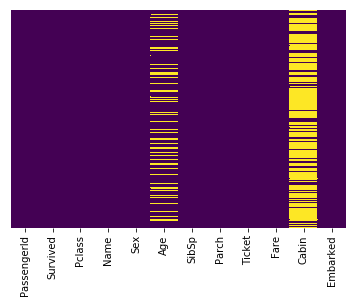

In [72]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

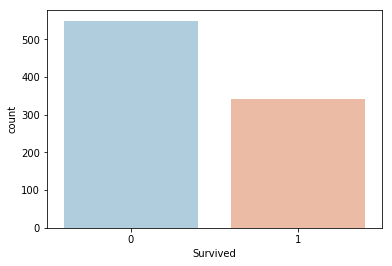

In [47]:
sns.countplot(x='Survived',data=titanic,palette='RdBu_r');

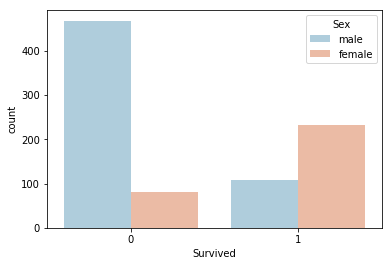

In [46]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r');

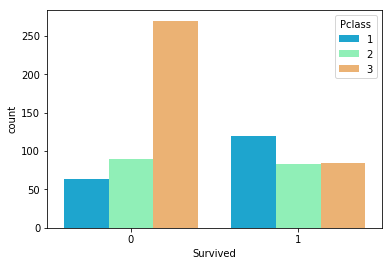

In [48]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow');

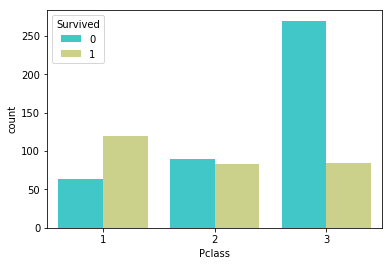

In [49]:
sns.countplot(x='Pclass',hue='Survived',data=train,palette='rainbow');

In [133]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [97]:
df = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [98]:
sex_conv = lambda x : 1 if x=='male' else 0 
df['Is_male'] = df['Sex'].apply(sex_conv)

In [99]:
age_conv = lambda x : 1 if x<=7 else (2 if x<18 else (3 if x<30 else (4 if x<45 else (4 if x>=45 else 5))))  
df['Age_Group'] = df['Age'].apply(age_conv)

In [100]:
embarked_new = pd.get_dummies(df['Embarked'])
train = pd.concat([df[['PassengerId','Survived','Pclass','Sex', 
                       'Age', 'SibSp', 'Parch', 'Fare','Embarked','Is_male','Age_Group']], embarked_new], axis=1)

In [239]:
titanic = pd.read_csv('train.csv')
df = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)

#Cinsiyeti dönüştürme
sex_conv = lambda x : 1 if x=='male' else 0 
df['Is_male'] = df['Sex'].apply(sex_conv)

# yaşın null olanları ortalama yapma
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

#Yaşı gruplandırma
age_conv = lambda x : 1 if x<=7 else (2 if x<18 else (3 if x<30 else (4 if x<45 else (4 if x>=45 else 5))))  
df['Age_Group'] = df['Age'].apply(age_conv)

#Binilen limanları gruplandırma
embarked_new = pd.get_dummies(df['Embarked'])
train = pd.concat([df[['PassengerId','Survived','Pclass','Sex', 
                       'Age', 'SibSp', 'Parch', 'Fare','Embarked','Is_male','Age_Group']], embarked_new], axis=1)

train = train.drop(['Sex', 'Embarked', 'Age'], axis=1)

X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=1))])
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
#pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Training set score: {:.3f}".format(pipe.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pipe.score(X_test, y_test)))
print('\n')
print('confusion_matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('confusion_matrix')
print(classification_report(y_test, y_pred))

Training set score: 0.814
Test set score: 0.827


confusion_matrix
[[163  19]
 [ 32  81]]


confusion_matrix
             precision    recall  f1-score   support

          0       0.84      0.90      0.86       182
          1       0.81      0.72      0.76       113

avg / total       0.83      0.83      0.82       295



In [240]:
titanic = pd.read_csv('train.csv')
df = titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)

#Cinsiyeti dönüştürme
sex_conv = lambda x : 1 if x=='male' else 0 
df['Is_male'] = df['Sex'].apply(sex_conv)

# yaşın null olanları ortalama yapma
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

#Yaşı gruplandırma
age_conv = lambda x : 1 if x<=7 else (2 if x<18 else (3 if x<30 else (4 if x<45 else (4 if x>=45 else 5))))  
df['Age_Group'] = df['Age'].apply(age_conv)

#Binilen limanları gruplandırma
embarked_new = pd.get_dummies(df['Embarked'])
train = pd.concat([df[['PassengerId','Survived','Pclass','Sex', 
                       'Age', 'SibSp', 'Parch', 'Fare','Embarked','Is_male','Age_Group']], embarked_new], axis=1)

train = train.drop(['Sex', 'Embarked', 'Age'], axis=1)

X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
#pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=1))])
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("Training set score: {:.3f}".format(pipe.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pipe.score(X_test, y_test)))
print('\n')
print('confusion_matrix')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('confusion_matrix')
print(classification_report(y_test, y_pred))

Training set score: 0.851
Test set score: 0.786


confusion_matrix
[[157  25]
 [ 38  75]]


confusion_matrix
             precision    recall  f1-score   support

          0       0.81      0.86      0.83       182
          1       0.75      0.66      0.70       113

avg / total       0.78      0.79      0.78       295



In [145]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=1))])
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
#pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
pipe.fit(X_train, y_train)
print("Training set score: {:.3f}".format(pipe.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pipe.score(X_test, y_test)))

Training set score: 0.814
Test set score: 0.827


In [ ]:
C_test = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10 , 100, 1000]
Train_score = []
Test_score = []
for i in C_test:
    pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=i))])
    #pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    #pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
    pipe.fit(X_train, y_train)
    Test_score.append(pipe.score(X_test, y_test))
    Train_score.append(pipe.score(X_train, y_train))
    print(i)
    print("Training set score: {:.3f}".format(pipe.score(X_train, y_train)))
    print("Test set score: {:.3f}".format(pipe.score(X_test, y_test)))
    print('----')

In [194]:
C_test

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

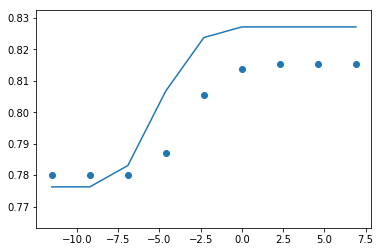

In [196]:
plt.scatter(np.log(C_test), Train_score)
plt.plot(np.log(C_test), Test_score)

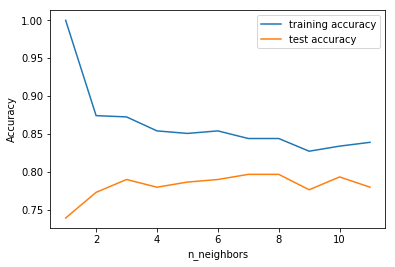

In [245]:
n_test = range(1,12)
train_score = []
test_score = []
for i in n_test:
    #pipe = Pipeline([('scaler', StandardScaler()), ('logreg', LogisticRegression(C=i))])
    #pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=i))])
    pipe.fit(X_train, y_train)
    test_score.append(pipe.score(X_test, y_test))
    train_score.append(pipe.score(X_train, y_train))
plt.plot(n_test, train_score, label="training accuracy")
plt.plot(n_test, test_score, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [160]:
print("Training set score: {:.3f}".format(pipe.score(X_train, y_train)))
print("Test set score: {:.3f}".format(pipe.score(X_test, y_test)))

Training set score: 0.814
Test set score: 0.827


In [19]:
y_pred = pipe.predict(X_test)
data = {'PassengerId': X_test[:,0], 'Survived_Predict': y_pred, 'Survived_Real': y_test}
df_predict = pd.DataFrame(data)
df_predict['PassengerId'] = df_predict['PassengerId'].astype('int64')

In [29]:
wrong_predicted_pass = df_predict[df_predict['Survived_Predict']!= df_predict['Survived_Real']][['PassengerId']]

In [201]:
def titanic_test(Test_df):
    df = Test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    # yaşın null olanları ortalama yapma
    df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)    

    sex_conv = lambda x : 1 if x=='male' else 0 
    df['Is_male'] = df['Sex'].apply(sex_conv)
    
    age_conv = lambda x : 1 if x<=7 else (2 if x<18 else (3 if x<30 else (4 if x<45 else (4 if x>=45 else 5))))
    df['Age_Group'] = df['Age'].apply(age_conv)

    #Binilen limanları gruplandırma
    embarked_new = pd.get_dummies(df['Embarked'])
    data_df = pd.concat([df[['PassengerId','Pclass','Sex', 
                       'Age', 'SibSp', 'Parch', 'Fare','Embarked','Is_male','Age_Group']], embarked_new], axis=1)
    
    X_new = data_df.drop(['Sex', 'Embarked', 'Age'], axis=1).values
    return X_new

In [202]:
test_df = pd.read_csv('test.csv')

In [203]:
test_df['Fare']= test_df['Fare'].fillna(12)

In [204]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [205]:
X_test_comp = titanic_test(test_df)

In [206]:
y_pred_comp = pipe.predict(X_test_comp)
data = {'PassengerId': X_test_comp[:,0], 'Survived': y_pred_comp}
df_predict = pd.DataFrame(data)
df_predict['PassengerId'] = df_predict['PassengerId'].astype('int32')
df_predict.to_csv('predictions.csv', index=False, float_format='%.0f')